In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
puma = pd.read_excel("/content/puma dataset.xlsx",header= 0)
puma.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/puma dataset.xlsx'

In [ ]:
# details  about columns, data types, and missing values
puma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [ ]:
# To understand how many rows and columns are present in the dataset
puma.shape

(9648, 13)

The dataset contains 9648 rows and 13 columns.

In [ ]:
#Summary statistics for numerical data
puma.describe()

,Retailer ID,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,2021-05-10 15:20:44.776119296,45.216625,256.930037,93273.437500,34425.244761,0.422991
min,1.128299e+06,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,2021-02-17 00:00:00,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,1.185732e+06,2021-06-04 00:00:00,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,1.185732e+06,2021-09-16 00:00:00,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,1.197831e+06,2021-12-31 00:00:00,110.000000,1275.000000,825000.000000,390000.000000,0.800000
std,2.636038e+04,NaN,14.705397,214.252030,141916.016727,54193.113713,0.097197


**OVERVIEW**

* The dataset contains 9,648 transactions.
* The average price per unit is 45.22, with a minimum of 7 and a maximum of 110.
* The average units sold per transaction is 257, ranging from 0 to 1,275 units.
* The average total sales per transaction is 93,273, but there is a high variation, with a maximum of 825,000.
* The operating profit per transaction averages 34,425, with a maximum of 390,000.
* The operating margin (profitability) ranges from 0.1 to 0.8, with an average of 0.42.

**KEY** **INSIGHTS**

* The majority of products are priced between 35 and 55 per unit (25th to 75th percentile). While some premium products are priced as high as 110 per unit.
* A typical retailer sells around 176 units per transaction (median), but the top 25% sell above 350 units. While some transactions recorded 0 sales, which could indicate canceled orders or returns.
* The top 25% of transactions generate 150K+ in sales, while the lower 25% are below 4,254.
* The operating margin varies significantly, with some transactions achieving 80% profit margins, while others are as low as 10%.
* High standard deviation in total sales and profit suggests large variations in transaction values.
* The median transaction date is June 4, 2021, meaning most transactions occurred in 2021.


**Exploratory** **Data** **Analysis**

In [ ]:
# check for duplicate values
duplicate = puma.duplicated().sum()
print("Number of duplicate values:", duplicate)

Number of duplicate values: 0


There are no duplicate rows in the dataset.

In [ ]:
#check for missing values
missing_values = puma.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64


We have zero missing values in the datset.

In [ ]:
# calculate revenue and profits
Total_Revenue = puma['Total Sales'].sum()
print(f"Total Revenue: ${Total_Revenue:.2f}")
Total_Profit = puma['Operating Profit'].sum()
print(f"Total Profit: ${Total_Profit:.2f}")
Revenue_in_2020 = puma[puma['Invoice Date'].dt.year == 2020]['Total Sales'].sum()
print(f" Total Revenue in 2020: ${Revenue_in_2020:.2f}")
Revenue_in_2021 = puma[puma['Invoice Date'].dt.year == 2021]['Total Sales'].sum()
print(f"Total  Revenue in 2021: ${Revenue_in_2021:.2f}")
Profit_in_2020 = puma[puma['Invoice Date'].dt.year == 2020]['Operating Profit'].sum()
print(f" Profit in 2020: ${Profit_in_2020:.2f}")
Profit_in_2021 = puma[puma['Invoice Date'].dt.year == 2021]['Operating Profit'].sum()
print(f"Profit in 2021: ${Profit_in_2021:.2f}")

Total Revenue: $899902125.00
Total Profit: $332134761.45
 Total Revenue in 2020: $182080675.00
Total  Revenue in 2021: $717821450.00
 Profit in 2020: $63375662.58
Profit in 2021: $268759098.87


**KEY INSIGHTS**
    

  Total Revenue for the year **2020** and **2021**   is approximately **$899.90 million.**

2020: Contributed 20.23% of the total revenue.

2021: Contributed 79.77% of the total revenue, highlighting the dominant financial contribution of 2021

2020: Accounted for 19.07% of the total profit.

2021: Accounted for 80.93% of the total profit, emphasizing the stronger profitability in 2021.

The growth rate is approximately 294.19%, showcasing exceptional performance in 2021.

The total profit margin across 2020 and 2021 is 36.91%, indicating a consistently strong ability to convert revenue into profit.










In [ ]:
#  Find best selling products and most profitting region / state/city
puma.groupby('Product')['Total Sales'].sum().sort_values(ascending=False).head(3)

,Total Sales
Product,
Men's Street Footwear,208826244.0
Women's Apparel,179038860.0
Men's Athletic Footwear,153673680.0


**KEY INSIGHTS**

*   Men's Street Footwear leads with the highest revenue of $208.83 million, contributing significantly to overall sales performance.
*   Women's Apparel performs strongly as the second-largest revenue driver, suggesting a competitive segment worth further focus.
*   Men's Athletic Footwear, while third, still makes up a significant share, highlighting potential opportunities for growth.



In [ ]:
puma.groupby('Region')['Total Sales'].sum().sort_values(ascending=False).head(3)

,Total Sales
Region,
West,269943182.0
Northeast,186324067.0
Southeast,163171236.0


**KEY INSIGHTS**

*   West leads with the highest revenue of $269.94 million
*   Northeast shows solid performance, accounting for nearly a third of the revenue, making it an important region to maintain focus on.
*  Southeast, while contributing slightly less, still represents over a quarter of total regional revenue, offering growth opportunities.


In [ ]:
puma.groupby('State')['Total Sales'].sum().sort_values(ascending=False).head(3)

,Total Sales
State,
New York,64229039.0
California,60174133.0
Florida,59283714.0


**KEY INSIGHTS**

* New York leads with the highest revenue of $64.23 million, indicating strong consumer engagement or market penetration in this state.
* alifornia and Florida closely follow, both contributing over 32% each, which signifies these states are also crucial markets.

In [ ]:
puma.groupby('City')['Total Sales'].sum().nlargest(3)
##by using sort_values(ascending=False).head(3) gives same answer

,Total Sales
City,
Charleston,39974797.0
New York,39801235.0
San Francisco,34539220.0


**KEY INSIGHTS**
* Charleston leads with the highest revenue of $39.97 million, slightly ahead of New York, showcasing its strong market presence.
* Charleston and New York are neck and neck in terms of revenue, with Charleston slightly ahead, making them pivotal cities for business.
* San Francisco, while trailing slightly, still contributes to the total, signifying it is an important market.






In [ ]:
# sales  trend over time
puma.set_index('Invoice Date', inplace=True)
puma=puma.sort_index()

In [ ]:
puma_filter = puma.loc['2020-01-01' : '2020-01-10']
print(puma_filter)

                 Retailer  Retailer ID     Region         State          City  \
Invoice Date                                                                    
2020-01-01    Foot Locker      1185732  Northeast      New York      New York   
2020-01-01    Foot Locker      1185732  Northeast  Pennsylvania  Philadelphia   
2020-01-01    Foot Locker      1185732  Northeast  Pennsylvania  Philadelphia   
2020-01-01    Foot Locker      1185732  Northeast      New York      New York   
2020-01-01    Foot Locker      1185732  Northeast      New York      New York   
2020-01-01    Foot Locker      1185732  Northeast  Pennsylvania  Philadelphia   
2020-01-02      West Gear      1128299  Northeast  Pennsylvania  Philadelphia   
2020-01-02      West Gear      1128299  Northeast  Pennsylvania  Philadelphia   
2020-01-02    Foot Locker      1185732  Northeast      New York      New York   
2020-01-02    Foot Locker      1185732  Northeast      New York      New York   
2020-01-02    Foot Locker   

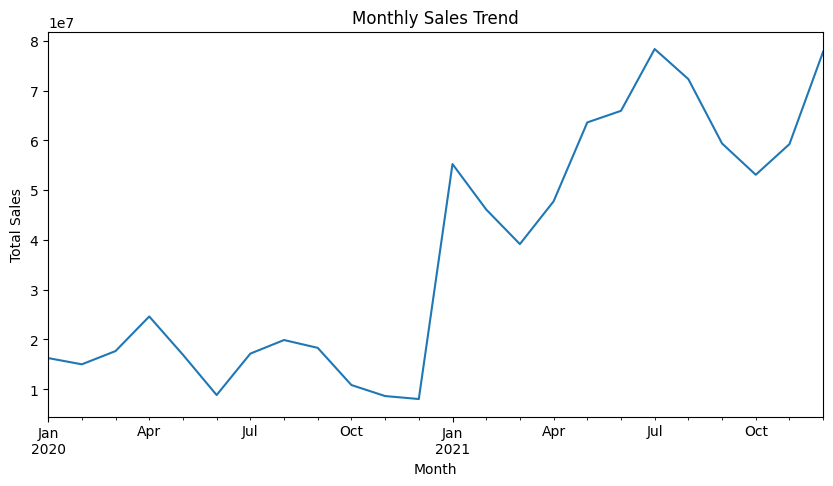

In [ ]:
puma.set_index('Invoice Date', inplace=True)
monthly_sales= puma['Total Sales'].resample('ME').sum()
monthly_sales.plot(figsize=(10,5),title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

**KEY INSIGHTS**
* 2020: Highest revenue was in April 2020 with $24,607,006.00, possibly due to seasonal demand or specific initiatives.

*   2020: Lowest revenue occurred in December 2020 at $8,026,527.00, potentially due to market conditions or lower consumer activity.

*  2021: Highest revenue was in July 2021 with $7,83,34,681, indicating strong performance during the holiday season.

*   2021: Revenue remained consistently higher, with the lowest month being March 2021 at $3,91,48,532.0







<ipython-input-18-1a8827959408>:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  monthly_sales= puma['Total Sales'].resample('Q').sum().plot(figsize=(10,4),title='Quartely Sales Trend')


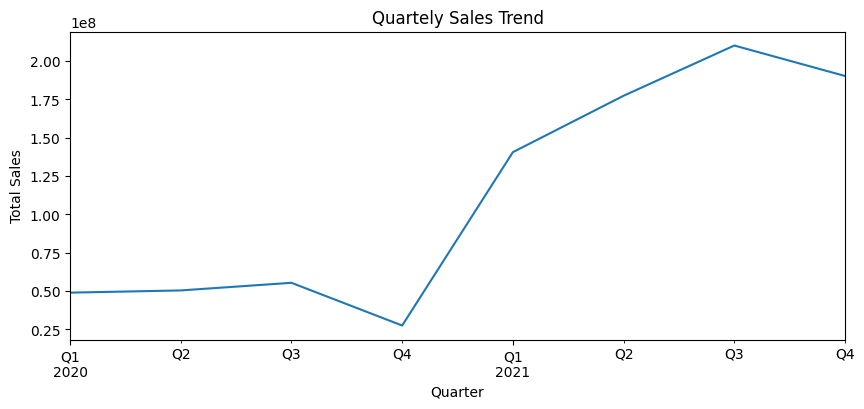

In [ ]:
monthly_sales= puma['Total Sales'].resample('Q').sum().plot(figsize=(10,4),title='Quartely Sales Trend')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.show()

**KEY INSIGHTS**

*   Steady Sales in Early 2020: The sales remained relatively stable from Q1 to Q3 2020, with a slight increase.
*   Decline in Q4 2020: There was a noticeable drop in total sales in Q4 2020.
*   Sharp Growth in 2021: Sales saw a significant rise from Q1 2021 onwards, peaking in Q3 2021.
*  Peak in Q3 2021: The highest sales were recorded in Q3 2021.




<Axes: title={'center': 'Sales Method Distribution'}, ylabel='Total Sales'>

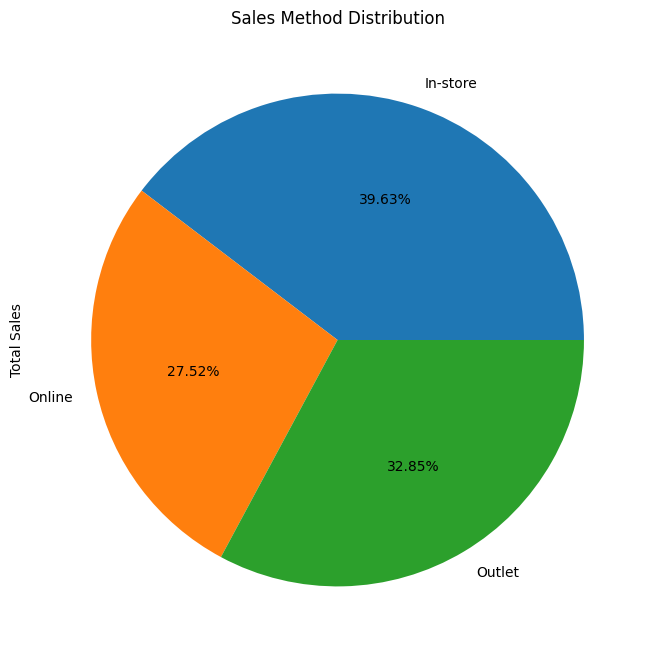

In [ ]:
puma.groupby('Sales Method')['Total Sales'].sum().plot(kind='pie',figsize=(12,8),autopct='%1.2f%%',title='Sales Method Distribution')

**KEY INSIGHTS**

*  In-Store Dominance: In-store sales contribute the largest share at 39.63%.
*  Outlet Performance: Outlets account for 32.85%, reflecting significant customer engagement in this sales method.
* Online Opportunities: Online sales make up 27.52%. While slightly trailing the other methods, this channel has immense growth potential, especially with increasing e-commerce trends.



In [ ]:
unique_retailer = puma['Retailer'].unique()
print("Total Unique Retailer :",unique_retailer)

Total Unique Retailer : ['Foot Locker' 'Walmart' 'Sports Direct' 'West Gear' "Kohl's" 'Amazon']


**KEY INSIGHTS**

There are total 6 unique retailers are selling puma products

* Walmart and Amazon can be leveraged for scale and accessibility due to their extensive reach.
* Specialized retailers like Foot Locker can target dedicated audiences for products like sports footwear.



In [ ]:
#calculate gender based on product
puma['Gender'] = puma['Product'].apply(lambda x : "Male" if "Men's" in x  else "Female" if "Women's" in x else "Unisex")
print(puma['Gender'].value_counts())

Gender
Male      4826
Female    4822
Name: count, dtype: int64


**KEY INSIIGHTS**
There are total 9648 Transactions happened in 2020 and 2021
*   4826 male products sold
*   4822 female products sold
*  The numbers for Male  and Female  are nearly equal, indicating a well-balanced representation products sold.





In [ ]:
puma['Product'].unique()

array(["Men's Street Footwear", "Men's Athletic Footwear",
       "Women's Street Footwear", "Women's Athletic Footwear",
       "Men's Apparel", "Women's Apparel"], dtype=object)

**KEY INSIGHTS**

There are total 6 unique products sold by puma :
*   Men's Street Footwear
*   Men's Athletic Footwear
*   Men's Apparel
*  Women's Street Footwear
*    Women's Athletic Footwear
*   Women's Apparel



In [ ]:
puma['Product Category'] = puma['Product'].apply(lambda x :"Street Footwear" if "Street Footwear" in x else "Athletic Footwear" if "Athletic Footwear" in x else "Apparel")
puma['Product Category'].unique()

array(['Street Footwear', 'Athletic Footwear', 'Apparel'], dtype=object)

In [ ]:
#creating a new month column
puma['Month'] = puma['Invoice Date'].dt.month_name()
puma.head(2)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Month
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.5,In-store,January
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.3,In-store,January


Month column created

In [ ]:
puma['Year'] = puma['Invoice Date'].dt.year
puma.head(2)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Month,Year
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.5,In-store,January,2020
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.3,In-store,January,2020


Year column created

In [ ]:
puma['Quarter'] = puma['Invoice Date'].dt.quarter
puma.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Month,Year,Quarter
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,January,2020,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,January,2020,1
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,January,2020,1
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,January,2020,1
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store,January,2020,1


In [ ]:
puma['Day of week'] = puma['Invoice Date'].dt.day_name()
puma.head(2)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Month,Year,Quarter,Day of week
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.5,In-store,January,2020,1,Wednesday
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.3,In-store,January,2020,1,Thursday


Days are created successfully

In [ ]:
puma['Revenue per Unit'] = puma['Total Sales'] / puma['Units Sold']
puma.head(5)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Month,Year,Quarter,Day of week,Revenue per Unit
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,January,2020,1,Wednesday,500.0
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,January,2020,1,Thursday,500.0
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,January,2020,1,Friday,400.0
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,January,2020,1,Saturday,450.0
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store,January,2020,1,Sunday,600.0


Revenue per Unit column created to calculate how much revenue per product we are getting

In [ ]:
puma['Profit per unit'] = puma['Operating Profit'] / puma['Units Sold']
puma.head(5)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Month,Year,Quarter,Day of week,Revenue per Unit,Profit per unit
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,January,2020,1,Wednesday,500.0,250.0
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,January,2020,1,Thursday,500.0,150.0
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,January,2020,1,Friday,400.0,140.0
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,January,2020,1,Saturday,450.0,157.5
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store,January,2020,1,Sunday,600.0,180.0


Profit per Unit column created to calculate how much Profit per product we are getting

In [ ]:
puma['Profit %'] = puma['Operating Profit'] / puma['Total Sales'] * 100
puma.head(5)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Month,Year,Quarter,Day of week,Revenue per Unit,Profit per unit,Profit %
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,January,2020,1,Wednesday,500.0,250.0,50.0
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,January,2020,1,Thursday,500.0,150.0,30.0
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,January,2020,1,Friday,400.0,140.0,35.0
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,January,2020,1,Saturday,450.0,157.5,35.0
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store,January,2020,1,Sunday,600.0,180.0,30.0


This profit % column  generates the profit percentage per product

In [ ]:
#Many time-based operations, such as resampling (e.g., monthly or weekly aggregation) or cumulative analysis, require data to be sorted by date.
# to calculate cumulative sales, first sort the date
sorted_dates = puma.sort_values('Invoice Date')
puma['Cumulative Sales'] = puma['Total Sales'].cumsum()
puma.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,...,Operating Margin,Sales Method,Month,Year,Quarter,Day of week,Revenue per Unit,Profit per unit,Profit %,Cumulative Sales
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,...,0.50,In-store,January,2020,1,Wednesday,500.0,250.0,50.0,600000.0
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,...,0.30,In-store,January,2020,1,Thursday,500.0,150.0,30.0,1100000.0
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,...,0.35,In-store,January,2020,1,Friday,400.0,140.0,35.0,1500000.0
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,...,0.35,In-store,January,2020,1,Saturday,450.0,157.5,35.0,1882500.0
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,...,0.30,In-store,January,2020,1,Sunday,600.0,180.0,30.0,2422500.0


CUMULATIVE SALE : Calculate total sales over time to track performance growth.

In [ ]:
puma['year-month'] = puma['Invoice Date'].dt.to_period('M')
print(puma['year-month'].head())

0    2020-01
1    2020-01
2    2020-01
3    2020-01
4    2020-01
Name: year-month, dtype: period[M]


Improved Data Organization: The year-month format makes it easier to work with months as discrete entities instead of dealing with daily dates.

In [ ]:
#sales growth rate % in each day
puma['salesgrowthrate%'] =puma['Total Sales'].pct_change() * 100
puma.groupby('year-month')['salesgrowthrate%'].sum()
puma.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,...,Year,Quarter,Day of week,Revenue per Unit,Profit per unit,Profit %,Cumulative Sales,year-month,salesgrowthrate%,Cumulative Profit
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,...,2020,1,Wednesday,500.0,250.0,50.0,600000.0,2020-01,NaN,300000.0
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,...,2020,1,Thursday,500.0,150.0,30.0,1100000.0,2020-01,-16.666667,450000.0
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,...,2020,1,Friday,400.0,140.0,35.0,1500000.0,2020-01,-20.000000,590000.0
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,...,2020,1,Saturday,450.0,157.5,35.0,1882500.0,2020-01,-4.375000,723875.0
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,...,2020,1,Sunday,600.0,180.0,30.0,2422500.0,2020-01,41.176471,885875.0


**KEY INSIGHTS**
*  **Positive Growth:** A positive percentage in the salesgrowthrate% column indicates an increase in sales compared to the previous period.
*  **Negative Growth:** A negative value shows a decline in sales from the prior period.
*  **NaN in First Row:** The first row of this column will likely be NaN (Not a Number) because there's no previous data to compare for the first entry.



In [ ]:
puma['Cumulative Profit'] = puma['Operating Profit'].cumsum()
puma['Cumulative Profit'].describe()

,Cumulative Profit
count,9.648000e+03
mean,2.665261e+08
std,9.235211e+07
min,3.000000e+05
25%,2.334348e+08
50%,3.199865e+08
75%,3.265070e+08
max,3.321348e+08


**KEY INSIGHTS**
*   The mean (average) value is approximately $266.53 million, suggesting a significant overall growth trend in cumulative profit

*   The standard deviation (std) is around $92.35 million, indicating some degree of variability in the growth of cumulative profit over time.

*   **Strong Growth**: The high median and maximum values reflect consistent growth, with cumulative profit building significantly over time.

*   **Controlled Variation**: While there's some variability (as indicated by the std), the data remains centered around $266 million, showing overall stability.




<Axes: ylabel='Total Sales'>

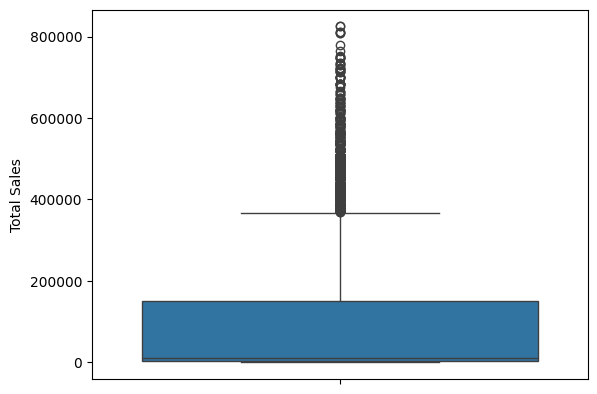

In [ ]:
sns.boxplot(y=puma['Total Sales'])


In [ ]:
# Top-performing retailers, products, and regions.
top_retailers = puma.groupby('Retailer')['Total Sales'].sum().nlargest(3)
top_products = puma.groupby('Product')['Total Sales'].sum().nlargest(3)
top_regions = puma.groupby('Region')['Total Sales'].sum().nlargest(3)
print("Top Retailers:")
print(top_retailers)
print("\nTop Products:")
print(top_products)
print("\nTop Regions:")
print(top_regions)

Top Retailers:
Retailer
West Gear        242964333.0
Foot Locker      220094720.0
Sports Direct    182470997.0
Name: Total Sales, dtype: float64

Top Products:
Product
Men's Street Footwear      208826244.0
Women's Apparel            179038860.0
Men's Athletic Footwear    153673680.0
Name: Total Sales, dtype: float64

Top Regions:
Region
West         269943182.0
Northeast    186324067.0
Southeast    163171236.0
Name: Total Sales, dtype: float64


**KEY INSIGHTS**

**Top Retailer**
*  **West Gear** leads with $242.96M in sales, followed closely by Foot Locker ($220.09M) and Sports Direct ($182.47M).
* These top three retailers contribute significantly to overall sales, likely indicating their strong market presence or effective strategies.


* **top Product**

*   **Men's Street Footwear** dominates with $208.83M in sales, followed by Women's Apparel ($179.04M) and Men's Athletic Footwear ($153.67M).
*  There’s a balance in demand between men’s and women’s products, with notable contributions from both footwear and apparel categories.


*  **Top Regions**


*   The **West region** leads in sales, contributing a massive $269.94M, with the Northeast ($186.32M) and Southeast ($163.17M) following behind.

*  The West's dominance suggests strong market penetration or unique regional demand.

*  **Overall Alignment :**
   High-performing retailers and products align well with the dominance of the **West region**. This indicates that a strong presence in the West supports both retailer and product sales.







In [ ]:
# sales trend
yearly_sales = puma.groupby('Year')['Total Sales'].sum().pct_change() * 100
print(yearly_sales)

Year
2020           NaN
2021    294.232639
Name: Total Sales, dtype: float64


**High Growth:**

*  The value shows a 294.23% growth in 2021 compared to 2020
*   A nearly 3x growth rate indicates an exceptionally strong performance  
     in 2021.

In [ ]:
#sales and peofit distribution by region and  state
region_sales = puma.groupby('Region')['Total Sales'].sum()
region_profit = puma.groupby('Region')['Operating Profit'].sum()
percentage_sales = region_sales / region_sales.sum() * 100
percentage_profit = region_profit / region_profit.sum() * 100
print("Region Sales:")
print(region_sales)
print("\nRegion Profit:")
print(region_profit)
print("\n Region Percentage Sales:")
print(percentage_sales)
print("\n State Percentage Profit:")
print(percentage_profit)

Region Sales:
Region
Midwest      135800459.0
Northeast    186324067.0
South        144663181.0
Southeast    163171236.0
West         269943182.0
Name: Total Sales, dtype: float64

Region Profit:
Region
Midwest      52811346.48
Northeast    68020587.65
South        61138004.07
Southeast    60555416.70
West         89609406.55
Name: Operating Profit, dtype: float64

 Region Percentage Sales:
Region
Midwest      15.090581
Northeast    20.704926
South        16.075435
Southeast    18.132109
West         29.996949
Name: Total Sales, dtype: float64

 State Percentage Profit:
Region
Midwest      15.900578
Northeast    20.479816
South        18.407590
Southeast    18.232183
West         26.979834
Name: Operating Profit, dtype: float64


**Regional Sales Performance**


*  The West region contributes the highest to sales with $269.94M, making up almost 30% of total sales. This highlights the West as a dominant market for your business.

*  The Northeast region follows with $186.32M in sales, accounting for over 20.7% of total sales.

*  Midwest, South, and Southeast regions collectively contribute the rest, with relatively balanced sales percentages ranging from 15% to 18%.
*   **Regional Profit Insights**
*   The West region leads in Operating Profit with $89.61M, showing strong profitability alongside its sales dominance.

* The Northeast region also performs well with $68.02M, slightly lower than the West but still robust.

*  Other regions like South, Southeast, and Midwest have profits ranging from $52.81M to $61.13M, indicating consistent performance across these areas.


*   **Sales vs. Profit Alignment**
*  The percentage of sales and profits by region align closely, meaning profitability aligns with sales contributions in most regions:






In [ ]:
# best selling product
best_selling_product = puma.groupby('Product')['Total Sales'].sum().nlargest(1)
print(best_selling_product)

Product
Men's Street Footwear    208826244.0
Name: Total Sales, dtype: float64


**Men's Street Footwear** stands out as a top-performing product ($208.83 million) contributing significantly to overall sales.

In [ ]:
profit_by_category = puma.groupby('Product')['Operating Profit'].sum()
print(profit_by_category)

Product
Men's Apparel                44763030.33
Men's Athletic Footwear      51846888.19
Men's Street Footwear        82802260.62
Women's Apparel              68650970.56
Women's Athletic Footwear    38975784.94
Women's Street Footwear      45095826.81
Name: Operating Profit, dtype: float64



* **Top  profitting Categories**

*  Men's Street Footwear leads with $82.80M, showing its dominance in the men's product segment.

*  Women's Apparel follows closely with $68.65M, making it the top-performing category for women's products.



In [ ]:
puma['Product Category'] = puma['Product'].apply(lambda x :"Street Footwear" if "Street Footwear" in x else "Athletic Footwear" if "Athletic Footwear" in x else "Apparel")
puma['Product Category'].unique()

array(['Street Footwear', 'Athletic Footwear', 'Apparel'], dtype=object)

In [ ]:
highest_selling_product_category = puma.groupby('Product Category')['Total Sales'].sum().nlargest(1)
print(highest_selling_product_category)

Product Category
Street Footwear    336829057.0
Name: Total Sales, dtype: float64


Street Footwear appears to be a major contributor to overall revenue, suggesting a strong customer preference for this product line.

In [ ]:
#Which retailer has the highest total sales?
highest_sales_retailer = puma.groupby('Retailer')['Total Sales'].sum().nlargest(1)
print(highest_sales_retailer)

Retailer
West Gear    242964333.0
Name: Total Sales, dtype: float64


West Gear's sales dominance reflects its strong market presence or successful strategies in reaching its target audience.

In [ ]:
#How does the total sales distribution vary across product categories?
sales_by_category = puma.groupby('Product Category')['Total Sales'].sum()
vary_in_percentage = sales_by_category / sales_by_category.sum() * 100
print(vary_in_percentage.round(2))

Product Category
Apparel              33.64
Athletic Footwear    28.93
Street Footwear      37.43
Name: Total Sales, dtype: float64




*  With 37.43% of total sales, Street Footwear emerges as the leading category. Its strong performance underscores its popularity and market demand.

*   Apparel contributes 33.64% to total sales, showcasing its critical role in the overall product mix. Its near parity with Street Footwear suggests a balanced demand between fashion and footwear.
*  Athletic Footwear accounts for 28.93%, which is slightly lower than the other two categories. However, this still reflects substantial sales and potential for growth through targeted marketing or product innovation.



In [ ]:
#Which city has the highest number of sales transactions?
highest_sales_city = puma.groupby('City')['Total Sales'].sum().nlargest(1)
print(highest_sales_city)

City
Charleston    39974797.0
Name: Total Sales, dtype: float64


The city of Charleston has contributed total sales of $39.97 million

In [ ]:
# What is the average operating profit margin across different regions?
avg_operating_profit_margin = puma.groupby('Region')['Operating Profit'].mean()
print(avg_operating_profit_margin.round(2))

Region
Midwest      28211.19
Northeast    28628.19
South        35380.79
Southeast    49473.38
West         36605.15
Name: Operating Profit, dtype: float64





*   **Southeast** region Leads with the highest average of 49,473.38, making it a strong performer among all regions.

*   The South has an average of 35,380.79, followed closely by the West at 36,605.15.
*   The Northeast at 28,628.19 and the Midwest at 28,211.19 have the lowest averages, suggesting these regions might require targeted strategies to boost performance.




In [ ]:
#Identify the top 5 cities contributing to total sales
top_cities = puma.groupby('City')['Total Sales'].sum().nlargest(5)
print(top_cities)

City
Charleston       39974797.0
New York         39801235.0
San Francisco    34539220.0
Miami            31600863.0
Portland         30545652.0
Name: Total Sales, dtype: float64


0.2658685038121967


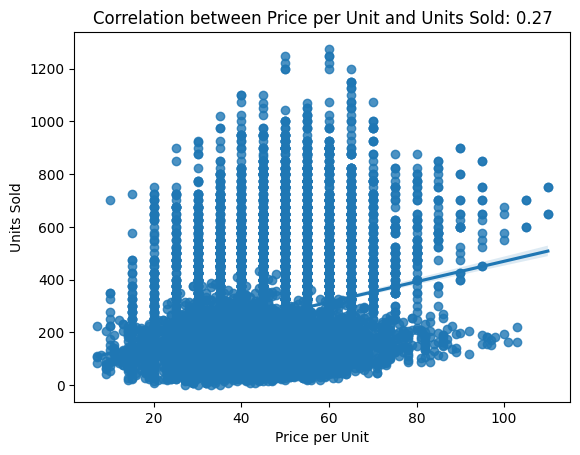

In [ ]:
#What is the correlation between price per unit and units sold? Is it negative or positive?
correlation = puma['Price per Unit'].corr(puma['Units Sold'])
print(correlation)
sns.regplot(x='Price per Unit', y='Units Sold', data=puma)
plt.title(f'Correlation between Price per Unit and Units Sold: {correlation:.2f}')
plt.xlabel('Price per Unit')
plt.ylabel('Units Sold')
plt.show()


The correlation of 0.26 between Price per Unit and Units Sold indicates a weak positive relationship.

* As the price per unit increases, the number of units sold tends to increase slightly, but the correlation is too weak to draw a strong conclusion



0.4358105645775898


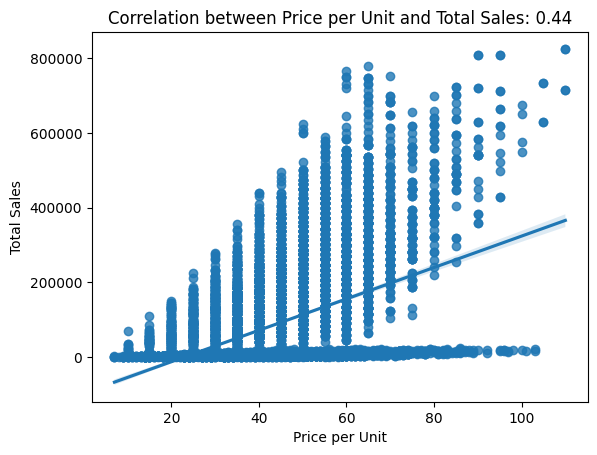

In [ ]:
correlation2 = puma['Price per Unit'].corr(puma['Total Sales'])
print(correlation2)
sns.regplot(x='Price per Unit', y='Total Sales', data=puma)
plt.title(f'Correlation between Price per Unit and Total Sales: {correlation2:.2f}')
plt.xlabel('Price per Unit')
plt.ylabel('Total Sales')
plt.show()


**correlation between price per unit and Total Sales is 0.44**

indicating a medium positive correlation
As price per unit increase,the total sales also increases eventuallly.

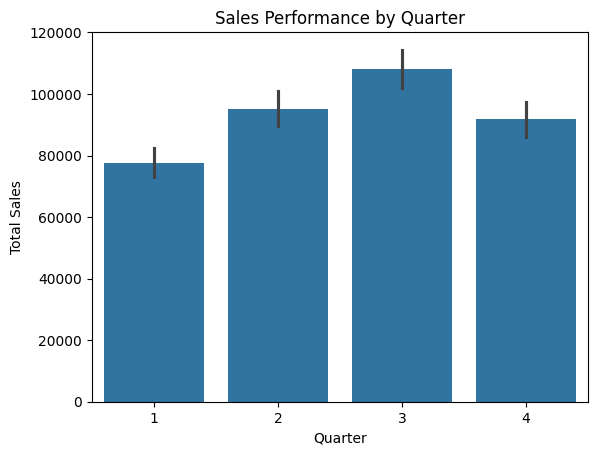

In [ ]:
#Does seasonality impact sales trends? Analyze sales performance by quarter
sns.barplot(x='Quarter', y='Total Sales', data=puma)
plt.title('Sales Performance by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.show()

In [ ]:
# best operting profit by state
best_profit_states = puma.groupby('State')['Operating Profit'].sum().nlargest(3)
print(best_profit_states)

State
New York      23329824.07
Florida       20926206.92
California    19301170.40
Name: Operating Profit, dtype: float64


**key insights**

Operating Profit for the state of New York, which amounts to approximately $23.33 million

New York's state is  highly profitability for Puma can be attributed to several factors:
*   **Market Size and Consumer Base:**
New York is a densely populated state with a diverse and affluent consumer base. This provides Puma with a large audience for its products, especially in urban areas like New York City.
*   **Brand Presence and Marketing:**
Puma likely invests heavily in marketing and brand visibility in New York, leveraging the state's status as a global fashion and cultural hub. This helps in attracting a wide range of customers.


In [ ]:
sales_method_comparision = puma.groupby('Sales Method')['Total Sales'].sum()
print(sales_method_comparision)

Sales Method
In-store    356643750.0
Online      247672882.0
Outlet      295585493.0
Name: Total Sales, dtype: float64


**Hypothesis Testing**

* Null Hypothesis (H0​): There is no significant difference in units sold before and after a price increase.

*  Alternative Hypothesis (H1​): Units sold decrease significantly after a price increase.






In [ ]:
from statsmodels.stats.weightstats import ztest
median_price = puma['Price per Unit'].median()
# devide the group into before and after price increase with the help of median
before_price_increase = puma[puma['Price per Unit'] <= median_price]['Units Sold']
after_price_increase = puma[puma['Price per Unit'] > median_price]['Units Sold']
# apply ztest
z_stat,p_value = ztest(before_price_increase,after_price_increase,alternative = 'two-sided')
print("Z-statistic:",z_stat)
print("P-value:",p_value)


Z-statistic: -20.021740150488668
P-value: 3.5606556583009565e-89


<ipython-input-15-7e448c9ea4e9>:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([before_price_increase, after_price_increase], labels=['Before Price Increase', 'After Price Increase'])


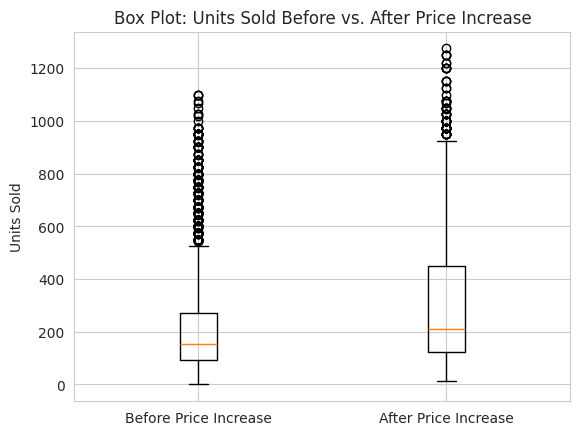

In [ ]:
plt.boxplot([before_price_increase, after_price_increase], labels=['Before Price Increase', 'After Price Increase'])
plt.title('Box Plot: Units Sold Before vs. After Price Increase')
plt.ylabel('Units Sold')
plt.show()


The median units sold decreased after the price increase.

There’s more variation in the "before price increase" group, suggesting some products sold a lot more before the increase.

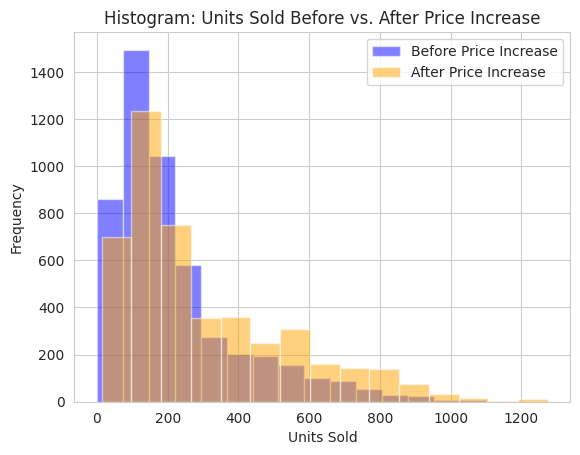

In [ ]:
plt.hist(before_price_increase, bins=15, alpha=0.5, label='Before Price Increase', color='blue')
plt.hist(after_price_increase, bins=15, alpha=0.5, label='After Price Increase', color='orange')
plt.title('Histogram: Units Sold Before vs. After Price Increase')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()


The blue curve (before price increase) is shifted right, meaning higher sales before the price increase.

The orange curve (after price increase) is more concentrated toward lower sales values.

                  Retailer ID  Price per Unit  Units Sold  Total Sales  \
Retailer ID          1.000000       -0.391684   -0.003194    -0.083580   
Price per Unit      -0.391684        1.000000    0.265869     0.435811   
Units Sold          -0.003194        0.265869    1.000000     0.913431   
Total Sales         -0.083580        0.435811    0.913431     1.000000   
Operating Profit    -0.027137        0.394546    0.892379     0.956307   
Operating Margin     0.216780       -0.137486   -0.305479    -0.364592   

                  Operating Profit  Operating Margin  
Retailer ID              -0.027137          0.216780  
Price per Unit            0.394546         -0.137486  
Units Sold                0.892379         -0.305479  
Total Sales               0.956307         -0.364592  
Operating Profit          1.000000         -0.211920  
Operating Margin         -0.211920          1.000000  


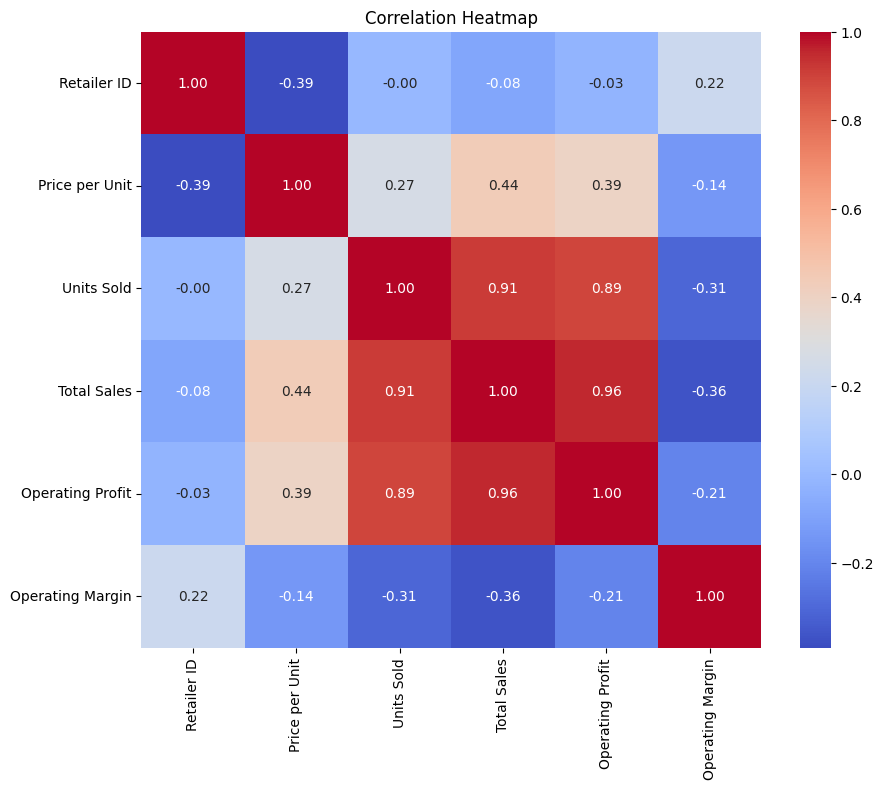

In [ ]:
puma_numeric = puma.select_dtypes(include=['float64', 'int64'])
correlation_matrix = puma_numeric.corr()
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


**Strong +ve correlation**

* Units Sold & Total Sales (0.91) → More units sold leads to higher total sales.

* Units Sold & Operating Profit (0.89) → Higher sales contribute significantly to profits.

* Total Sales & Operating Profit (0.96) → Revenue directly impacts profitability.

** Modrate +ve correlation **

* Price per Unit & Operating Profit (0.39) → Higher pricing contributes to profit, but not as strongly as sales volume.

* Price per Unit & Total Sales (0.44) → Moderate positive correlation suggests premium pricing might work but needs balance.

**-ve correlation**

* Price per Unit & Units Sold (0.27) → Weak positive correlation; price changes slightly influence sales.

* Operating Margin & Units Sold (-0.31) → Higher sales don't always mean better margins, possibly due to discounts.

* Operating Margin & Total Sales (-0.36) → More revenue does not necessarily improve profitability, likely due to cost factors.